In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, classification, accuracy_score, plot_confusion_matrix
from sklearn.svm import SVC

C:\Users\guill\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data_mat = pd.read_csv('student/student-mat.csv', sep=';')
data_por = pd.read_csv('student/student-por.csv', sep=';')

In [3]:
data_mat.shape

(395, 33)

In [4]:
data_por.shape

(649, 33)

In [5]:
def label_class_binary(row):
    if row['G3'] <= 9:
        return 0
    elif 10 <= row['G3'] <= 20:
        return 1

In [6]:
data_por['Dalc'] = data_por['Dalc'] + data_por['Walc']

In [7]:
usable_data_grades = data_por[['sex', 'age', 'school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3']]
usable_data_no_grades = data_por[['sex', 'age', 'school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences', 'G3']]
social_data = data_por[['famsize', 'Pstatus', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'G3']]
academic_data_grades = data_por[['studytime', 'failures', 'paid', 'higher', 'internet', 'absences', 'G1', 'G2', 'G3']]
academic_data_no_grades = data_por[['studytime', 'failures', 'paid', 'higher', 'internet', 'absences', 'G3']]
personal_data = data_por[['sex', 'address', 'Medu', 'Fedu', 'traveltime', 'activities', 'romantic', 'famrel', 'goout', 'Dalc', 'health', 'G3']]

In [8]:
usable_data_grades['paid'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['activities'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['higher'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['internet'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['romantic'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['schoolsup'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['famsup'].replace(['yes','no'],[1,0],inplace=True)
usable_data_grades['nursery'].replace(['yes','no'],[1,0],inplace=True)

usable_data_no_grades['paid'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['activities'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['higher'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['internet'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['romantic'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['schoolsup'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['famsup'].replace(['yes','no'],[1,0],inplace=True)
usable_data_no_grades['nursery'].replace(['yes','no'],[1,0],inplace=True)


social_data['romantic'].replace(['yes','no'],[1,0],inplace=True)

academic_data_grades['paid'].replace(['yes','no'],[1,0],inplace=True)
academic_data_grades['higher'].replace(['yes','no'],[1,0],inplace=True)
academic_data_grades['internet'].replace(['yes','no'],[1,0],inplace=True)

academic_data_no_grades['paid'].replace(['yes','no'],[1,0],inplace=True)
academic_data_no_grades['higher'].replace(['yes','no'],[1,0],inplace=True)
academic_data_no_grades['internet'].replace(['yes','no'],[1,0],inplace=True)

personal_data['activities'].replace(['yes','no'],[1,0],inplace=True)
personal_data['romantic'].replace(['yes','no'],[1,0],inplace=True)

C:\Users\guill\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
# Get one hot encoding of columns

usable_data_grades = pd.get_dummies(data=usable_data_grades, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'])
usable_data_no_grades = pd.get_dummies(data=usable_data_no_grades, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'])
#usable_data_por = pd.get_dummies(data=usable_data_por, columns=['sex', 'age', 'address', 'famsize', 'Pstatus'])
social_data = pd.get_dummies(data=social_data, columns=['famsize', 'Pstatus'])
personal_data = pd.get_dummies(data=personal_data, columns=['sex', 'address'])

In [10]:
def create_classes(label_class_function):
    usable_data_grades['class'] = usable_data_grades.apply (lambda row: label_class_function(row), axis=1)
    usable_data_no_grades['class'] = usable_data_no_grades.apply (lambda row: label_class_function(row), axis=1)
    academic_data_grades['class'] = academic_data_grades.apply (lambda row: label_class_function(row), axis=1)
    academic_data_no_grades['class'] = academic_data_no_grades.apply (lambda row: label_class_function(row), axis=1)
    social_data['class'] = social_data.apply (lambda row: label_class_function(row), axis=1)
    personal_data['class'] = social_data.apply (lambda row: label_class_function(row), axis=1)
    
create_classes(label_class_binary)

C:\Users\guill\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\guill\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
usable_data_grades = usable_data_grades.drop(['G3'], axis=1)
academic_data_grades = academic_data_grades.drop(['G3'], axis=1)
usable_data_no_grades = usable_data_no_grades.drop(['G3'], axis=1)
academic_data_no_grades = academic_data_no_grades.drop(['G3'], axis=1)
social_data = social_data.drop(['G3'], axis=1)
personal_data = personal_data.drop(['G3'], axis=1)

In [12]:
usable_data_grades['class'].value_counts()

1    549
0    100
Name: class, dtype: int64

In [13]:
dataX_usbl_grades = usable_data_grades.loc[:, usable_data_grades.columns != 'class']
dataY_usbl_grades = usable_data_grades['class']

dataX_acdmc_grades = academic_data_grades.loc[:, academic_data_grades.columns != 'class']
dataY_acdmc_grades = academic_data_grades['class']

dataX_usbl_no_grades = usable_data_no_grades.loc[:, usable_data_no_grades.columns != 'class']
dataY_usbl_no_grades = usable_data_no_grades['class']

dataX_acdmc_no_grades = academic_data_no_grades.loc[:, academic_data_no_grades.columns != 'class']
dataY_acdmc_no_grades = academic_data_no_grades['class']

dataX_soc = social_data.loc[:, social_data.columns != 'class']
dataY_soc = social_data['class']

dataX_per = personal_data.loc[:, personal_data.columns != 'class']
dataY_per = personal_data['class']

In [14]:
# Dividimos los datos en forma aleatoria utilizando la funcion
# train_test_split de sklearn en conjuntos de entrenamiento (60%),
# validación (20%) y testeo (20%)

test_ratio = 0.40

X_train_usbl_grades, X_test_usbl_grades, Y_train_usbl_grades, Y_test_usbl_grades = train_test_split(dataX_usbl_grades, dataY_usbl_grades, test_size=test_ratio, random_state=46)
X_train_acdmc_grades, X_test_acdmc_grades, Y_train_acdmc_grades, Y_test_acdmc_grades = train_test_split(dataX_acdmc_grades, dataY_acdmc_grades, test_size=test_ratio, random_state=46)
X_train_usbl_no_grades, X_test_usbl_no_grades, Y_train_usbl_no_grades, Y_test_usbl_no_grades = train_test_split(dataX_usbl_no_grades, dataY_usbl_no_grades, test_size=test_ratio, random_state=46)
X_train_acdmc_no_grades, X_test_acdmc_no_grades, Y_train_acdmc_no_grades, Y_test_acdmc_no_grades = train_test_split(dataX_acdmc_no_grades, dataY_acdmc_no_grades, test_size=test_ratio, random_state=46)
X_train_soc, X_test_soc, Y_train_soc, Y_test_soc = train_test_split(dataX_soc, dataY_soc, test_size=test_ratio, random_state=46)
X_train_per, X_test_per, Y_train_per, Y_test_per = train_test_split(dataX_per, dataY_per, test_size=test_ratio, random_state=46)

In [15]:
sc_usbl_grades = StandardScaler()
sc_acdmc_grades = StandardScaler()
sc_usbl_no_grades = StandardScaler()
sc_acdmc_no_grades = StandardScaler()
sc_soc = StandardScaler()
sc_per = StandardScaler()
X_train_usbl_grades_svc = sc_usbl_grades.fit_transform(X_train_usbl_grades)
X_train_acdmc_grades_svc = sc_acdmc_grades.fit_transform(X_train_acdmc_grades)
X_train_usbl_no_grades_svc = sc_usbl_no_grades.fit_transform(X_train_usbl_no_grades)
X_train_acdmc_no_grades_svc = sc_acdmc_no_grades.fit_transform(X_train_acdmc_no_grades)
X_train_soc_svc = sc_soc.fit_transform(X_train_soc)
X_train_per_svc = sc_per.fit_transform(X_train_per)

X_test_usbl_grades_svc = sc_usbl_grades.transform(X_test_usbl_grades)
X_test_acdmc_grades_svc = sc_acdmc_grades.transform(X_test_acdmc_grades)
X_test_usbl_no_grades_svc = sc_usbl_no_grades.transform(X_test_usbl_no_grades)
X_test_acdmc_no_grades_svc = sc_acdmc_no_grades.transform(X_test_acdmc_no_grades)
X_test_soc_svc = sc_soc.transform(X_test_soc)
X_test_per_svc = sc_per.transform(X_test_per)


In [16]:
clf_usbl_grades = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')
clf_acdmc_grades = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')
clf_usbl_no_grades = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')
clf_acdmc_no_grades = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')
clf_soc = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')
clf_per = LogisticRegression(solver='lbfgs',max_iter=5000, class_weight='balanced', multi_class='ovr')

svc_usbl_grades = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)
svc_acdmc_grades = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)
svc_usbl_no_grades = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)
svc_acdmc_no_grades = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)
svc_soc = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)
svc_per = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=0)


clf_usbl_grades.fit(X_train_usbl_grades, Y_train_usbl_grades)
clf_acdmc_grades.fit(X_train_acdmc_grades, Y_train_acdmc_grades)
clf_usbl_no_grades.fit(X_train_usbl_no_grades, Y_train_usbl_no_grades)
clf_acdmc_no_grades.fit(X_train_acdmc_no_grades, Y_train_acdmc_no_grades)
clf_soc.fit(X_train_soc, Y_train_soc)
clf_per.fit(X_train_per, Y_train_per)

svc_usbl_grades.fit(X_train_usbl_grades_svc, Y_train_usbl_grades)
svc_acdmc_grades.fit(X_train_acdmc_grades_svc, Y_train_acdmc_grades)
svc_usbl_no_grades.fit(X_train_usbl_no_grades_svc, Y_train_usbl_no_grades)
svc_acdmc_no_grades.fit(X_train_acdmc_no_grades_svc, Y_train_acdmc_no_grades)
svc_soc.fit(X_train_soc_svc, Y_train_soc)
svc_per.fit(X_train_per_svc, Y_train_per)


y_pred_usbl_grades = clf_usbl_grades.predict(X_test_usbl_grades)
y_pred_acdmc_grades = clf_acdmc_grades.predict(X_test_acdmc_grades)
y_pred_usbl_no_grades = clf_usbl_no_grades.predict(X_test_usbl_no_grades)
y_pred_acdmc_no_grades = clf_acdmc_no_grades.predict(X_test_acdmc_no_grades)
y_pred_soc = clf_soc.predict(X_test_soc)
y_pred_per = clf_per.predict(X_test_per)

y_pred_usbl_grades_svc = svc_usbl_grades.predict(X_test_usbl_grades_svc)
y_pred_acdmc_grades_svc = svc_acdmc_grades.predict(X_test_acdmc_grades_svc)
y_pred_usbl_no_grades_svc = svc_usbl_no_grades.predict(X_test_usbl_no_grades_svc)
y_pred_acdmc_no_grades_svc = svc_acdmc_no_grades.predict(X_test_acdmc_no_grades_svc)
y_pred_soc_svc = svc_soc.predict(X_test_soc_svc)
y_pred_per_svc = svc_per.predict(X_test_per_svc)

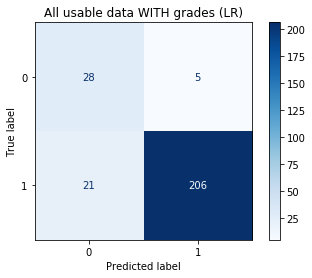

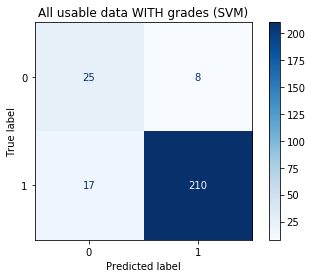

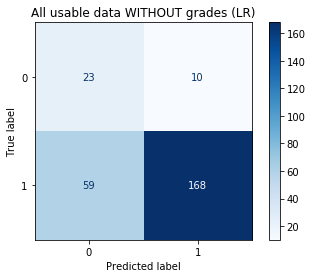

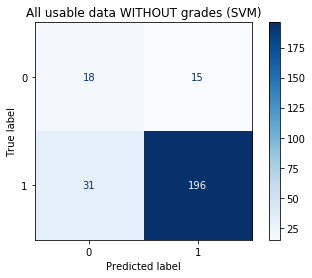

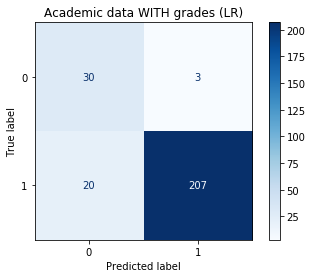

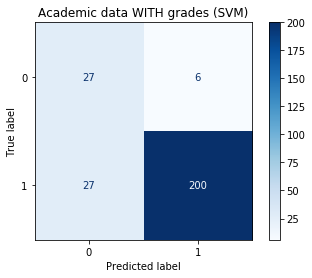

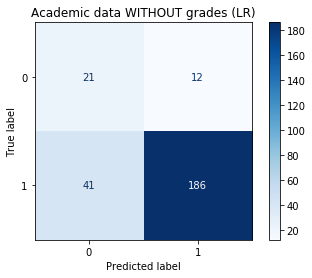

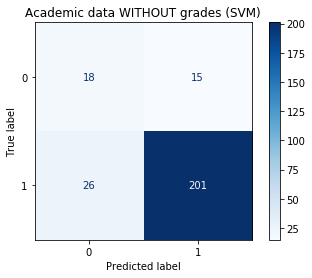

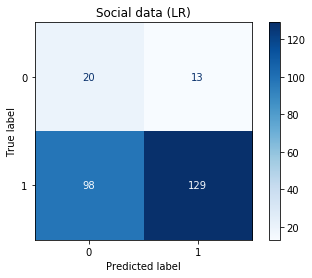

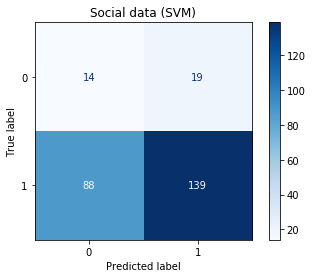

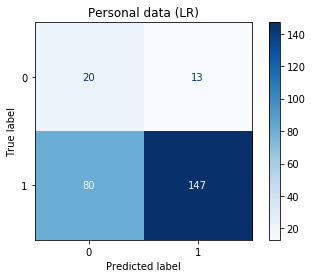

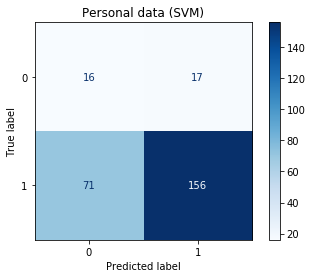

In [17]:
# Plots for all the confusion matrices

titles_options = [("All usable data WITH grades (LR)", clf_usbl_grades, X_test_usbl_grades, Y_test_usbl_grades, 'binary_lr_usbl_with'),
                  ("All usable data WITH grades (SVM)", svc_usbl_grades, X_test_usbl_grades_svc, Y_test_usbl_grades, 'binary_svm_usbl_with'),
                  ("All usable data WITHOUT grades (LR)", clf_usbl_no_grades, X_test_usbl_no_grades, Y_test_usbl_no_grades, 'binary_lr_usbl_without'),
                  ("All usable data WITHOUT grades (SVM)", svc_usbl_no_grades, X_test_usbl_no_grades_svc, Y_test_usbl_no_grades, 'binary_svm_usbl_without'),
                  ("Academic data WITH grades (LR)", clf_acdmc_grades, X_test_acdmc_grades, Y_test_acdmc_grades, 'binary_lr_acdmc_with'),
                  ("Academic data WITH grades (SVM)", svc_acdmc_grades, X_test_acdmc_grades_svc, Y_test_acdmc_grades, 'binary_svm_acdmc_with'),
                  ("Academic data WITHOUT grades (LR)", clf_acdmc_no_grades, X_test_acdmc_no_grades, Y_test_acdmc_no_grades, 'binary_lr_acdmc_without'),
                  ("Academic data WITHOUT grades (SVM)", svc_acdmc_no_grades, X_test_acdmc_no_grades_svc, Y_test_acdmc_no_grades, 'binary_svm_acdmc_without'),
                  ("Social data (LR)", clf_soc, X_test_soc, Y_test_soc, 'binary_lr_soc'),
                  ("Social data (SVM)", svc_soc, X_test_soc_svc, Y_test_soc, 'binary_svm_soc'),
                  ("Personal data (LR)", clf_per, X_test_per, Y_test_per, 'binary_lr_per'),
                  ("Personal data (SVM)", svc_per, X_test_per_svc, Y_test_per, 'binary_svm_per')]
for title, classifier, x_test, y_test, name in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 values_format='d')
    disp.ax_.set_title(title)

    image = name + '.png'
    #plt.savefig(image, dpi=300, bbox_inches='tight')
    

plt.show()

In [18]:
prints = [('USABLE WITH GRADES', Y_test_usbl_grades, y_pred_usbl_grades, Y_test_usbl_grades, y_pred_usbl_grades_svc),
         ('USABLE WITHOUT GRADES', Y_test_usbl_no_grades, y_pred_usbl_no_grades, Y_test_usbl_no_grades, y_pred_usbl_no_grades_svc),
         ('ACADEMIC WITH GRADES', Y_test_acdmc_grades, y_pred_acdmc_grades, Y_test_acdmc_grades, y_pred_acdmc_grades_svc),
         ('ACADEMIC WITHOUT GRADES', Y_test_acdmc_no_grades, y_pred_acdmc_no_grades, Y_test_acdmc_no_grades, y_pred_acdmc_no_grades_svc),
         ('SOCIAL', Y_test_soc, y_pred_soc, Y_test_soc, y_pred_soc_svc),
         ('PERSONAL', Y_test_per, y_pred_per, Y_test_per, y_pred_per_svc)]

for title, y_test, y_pred, y_test_svc, y_pred_svc in prints:
    report_lr = classification_report(y_test, y_pred)
    report_svm = classification_report(y_test_svc, y_pred_svc)
    print('----------------------------------------------------------------')
    print('------------------------', title, '--------------------------')
    print('----------------------------------------------------------------')
    print('LOGISTIC REGRESSION')
    print(report_lr)
    print('SUPPORT VECTOR MACHINES')
    print(report_svm)
    print('------------------------------------------------------------')
    print('\n')

----------------------------------------------------------------
------------------------ USABLE WITH GRADES --------------------------
----------------------------------------------------------------
LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.57      0.85      0.68        33
           1       0.98      0.91      0.94       227

    accuracy                           0.90       260
   macro avg       0.77      0.88      0.81       260
weighted avg       0.92      0.90      0.91       260

SUPPORT VECTOR MACHINES
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        33
           1       0.96      0.93      0.94       227

    accuracy                           0.90       260
   macro avg       0.78      0.84      0.81       260
weighted avg       0.92      0.90      0.91       260

------------------------------------------------------------


--------------------------------------

In [19]:
# Tables for LaTeX

'''
prints = [('USABLE WITH GRADES', Y_test_usbl_grades, y_pred_usbl_grades, Y_test_usbl_grades, y_pred_usbl_grades_svc),
         ('USABLE WITHOUT GRADES', Y_test_usbl_no_grades, y_pred_usbl_no_grades, Y_test_usbl_no_grades, y_pred_usbl_no_grades_svc),
         ('ACADEMIC WITH GRADES', Y_test_acdmc_grades, y_pred_acdmc_grades, Y_test_acdmc_grades, y_pred_acdmc_grades_svc),
         ('ACADEMIC WITHOUT GRADES', Y_test_acdmc_no_grades, y_pred_acdmc_no_grades, Y_test_acdmc_no_grades, y_pred_acdmc_no_grades_svc),
         ('SOCIAL', Y_test_soc, y_pred_soc, Y_test_soc, y_pred_soc_svc),
         ('PERSONAL', Y_test_per, y_pred_per, Y_test_per, y_pred_per_svc)]

for title, y_test, y_pred, y_test_svc, y_pred_svc in prints:
    report_lr = classification_report(y_test, y_pred, output_dict=True)
    report_svm = classification_report(y_test_svc, y_pred_svc, output_dict=True)
    data_lr = pd.DataFrame(report_lr).transpose()
    data_svm = pd.DataFrame(report_svm).transpose()
    cptn = title
    print('----------------------------------------------------------------')
    print('------------------------', title, '--------------------------')
    print('----------------------------------------------------------------')
    print('LOGISTIC REGRESSION')
    print(data_lr.to_latex(index=True, caption=cptn))
    print('SUPPORT VECTOR MACHINES')
    print(data_svm.to_latex(index=True, caption=cptn))
    print('------------------------------------------------------------')
    print('\n')
'''

----------------------------------------------------------------
------------------------ USABLE WITH GRADES --------------------------
----------------------------------------------------------------
LOGISTIC REGRESSION
\begin{table}
\centering
\caption{USABLE WITH GRADES}
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &  support \\
\midrule
0            &   0.571429 &  0.848485 &  0.682927 &     33.0 \\
1            &   0.976303 &  0.907489 &  0.940639 &    227.0 \\
accuracy     &   0.900000 &  0.900000 &  0.900000 &      0.9 \\
macro avg    &   0.773866 &  0.877987 &  0.811783 &    260.0 \\
weighted avg &   0.924915 &  0.900000 &  0.907930 &    260.0 \\
\bottomrule
\end{tabular}
\end{table}

SUPPORT VECTOR MACHINES
\begin{table}
\centering
\caption{USABLE WITH GRADES}
\begin{tabular}{lrrrr}
\toprule
{} &  precision &    recall &  f1-score &     support \\
\midrule
0            &   0.595238 &  0.757576 &  0.666667 &   33.000000 \\
1            &   0.963303 & 